In [2]:
#Импортируем некоторые из нужных модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('fetal_health.csv') #считываем и смотрим файл с датасетом(датасет о состоянии плода)
data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
print("Какие есть параметры и их тип:")
print(data.dtypes)
print("Сколько всего образцов:", len(data))
print("количество признаков:", len(data.columns))

Какие есть параметры и их тип:
baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                    

Немного о признаках<br>
baseline value - Базовая частота сердечных сокращений плода (ЧСС)<br>
accelerations - Число ускорений в секунду<br>
fetal_movement - Число движений плода в секунду<br>
uterine_contractions - Число сокращений матки в секунду<br>
light_decelerations - Количество LD в секунду<br>
severe_decelerations - Количество SD в секунду<br>
prolongued_decelerations - Количество ПД в секунду<br>
abnormal_short_term_variability - Процент времени с аномальной краткосрочной изменчивостью<br>
mean_value_of_short_term_variability - Среднее значение краткосрочной изменчивости<br>
percentage_of_time_with_abnormal_long_term_variability - Процент времени с аномальной долгосрочной изменчивостью<br>
mean_value_of_long_term_variability - Среднее значение долгосрочной изменчивости<br>
histogram_width - Ширина гистограммы, построенной с использованием всех значений из записи<br>
histogram_min - Минимальное значение гистограммы<br>
histogram_max - Максимальное значение гистограммы<br>
histogram_number_of_peaks - Количество пиков в гистограмме<br>
histogram_number_of_zeroes - Количество нулей в гистограмме<br>
histogram_mode - Гистограмма режимов<br>
histogram_mean - Гистограмма срених<br>
histogram_median - Гистограмма медиан<br>
histogram_variance - Гистограмма дисперсий<br>
histogram_tendency - Гистограмма тренда<br>
fetal_health - Здоровье плода: 1 — Нормальное 2 — Подозрительное 3 — Патологическое

In [5]:
np.sum(data.isna(), axis = 0)  #смотрим количество пропусков по столбцам

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

В нашем датасете 0 пропусков, необходимости их обрабатывать нет

In [6]:
data.describe() #небольшая характеристика данных с помощью функции describe

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

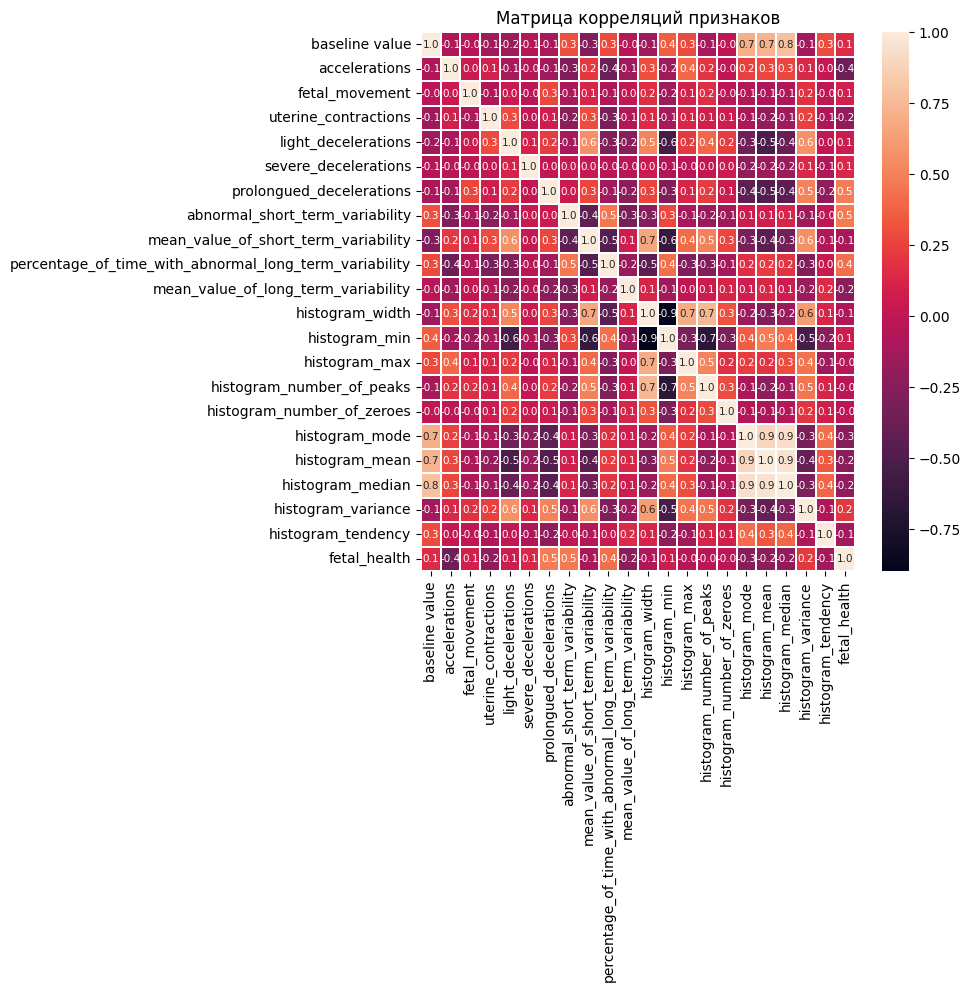

In [7]:
#Строим матрицу корреляций признаков
corr = data.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr, annot = True, fmt=".1f", linewidths=0.01, annot_kws={"fontsize":7.5})
plt.title("Матрица корреляций признаков")
plt.show()

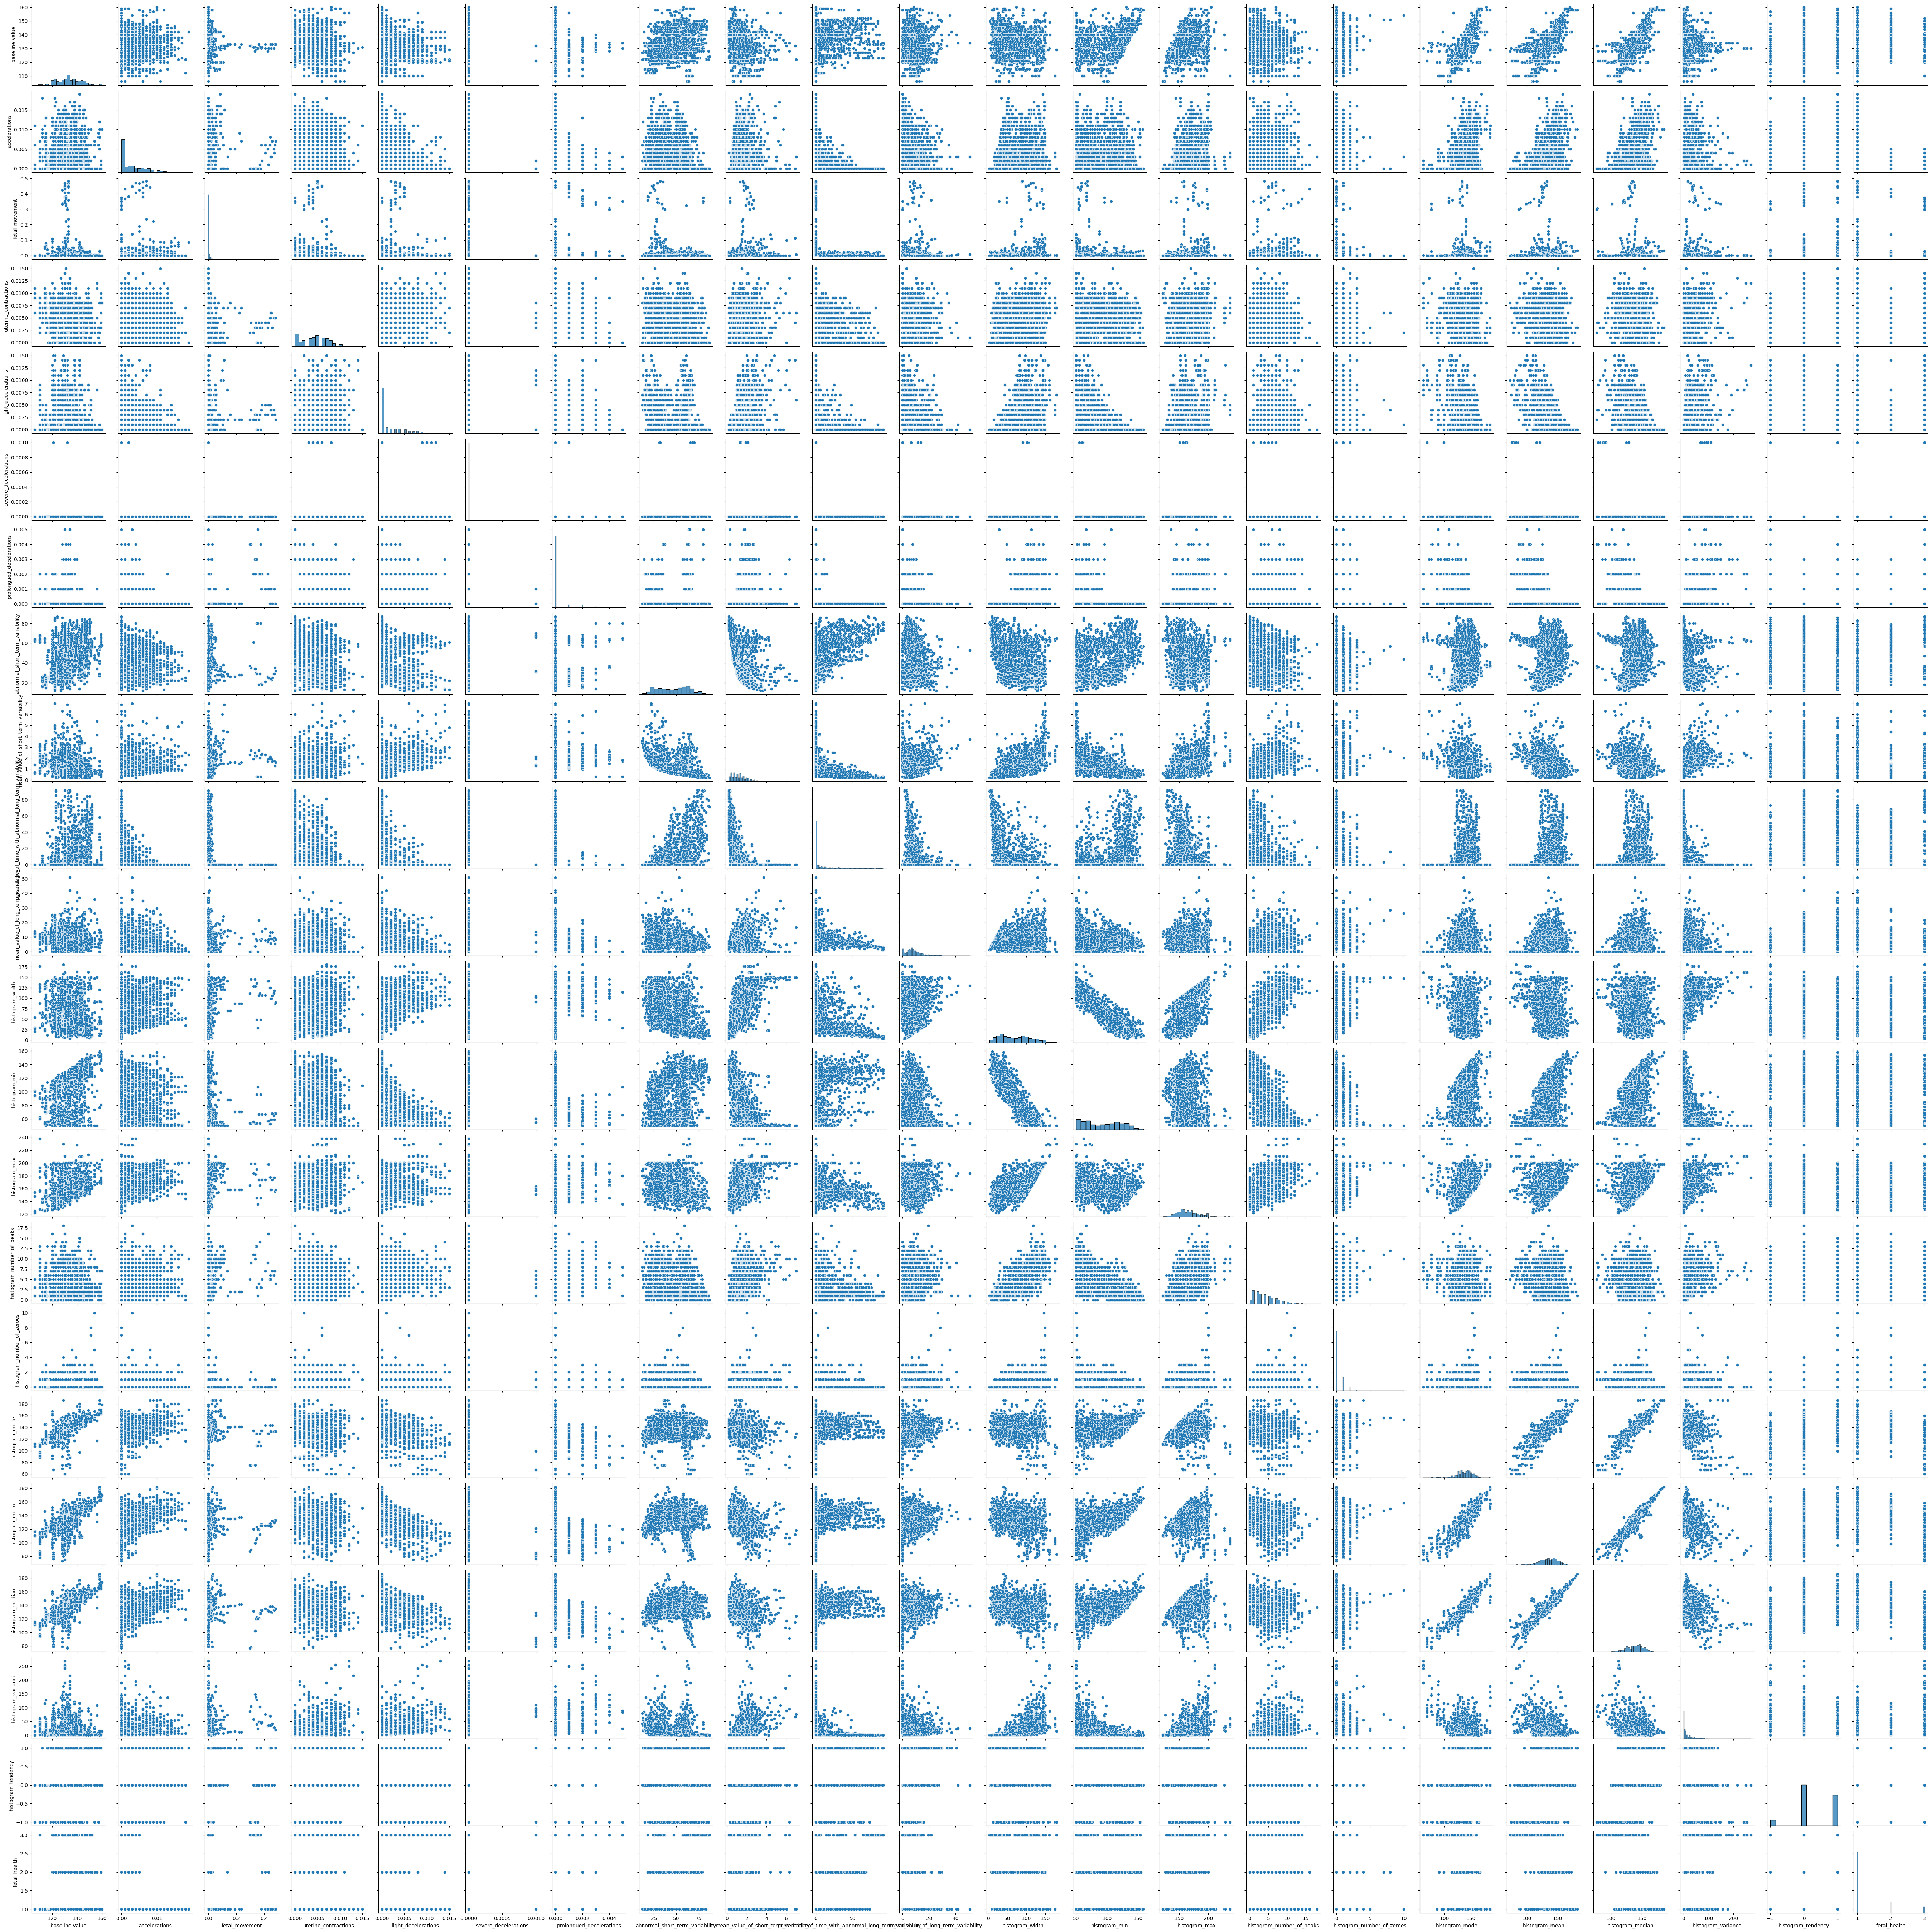

In [8]:
sns.pairplot(data)

Построим дальнейшие графики для обего просмотра данных, сначала попробуем распределение по boxplot. Стоит сказать что для некоторых данных использовать его не совсем корректно, но такие данные сразу будут выделятся, так что пока не будем зацикливаться на фильтровке данных.

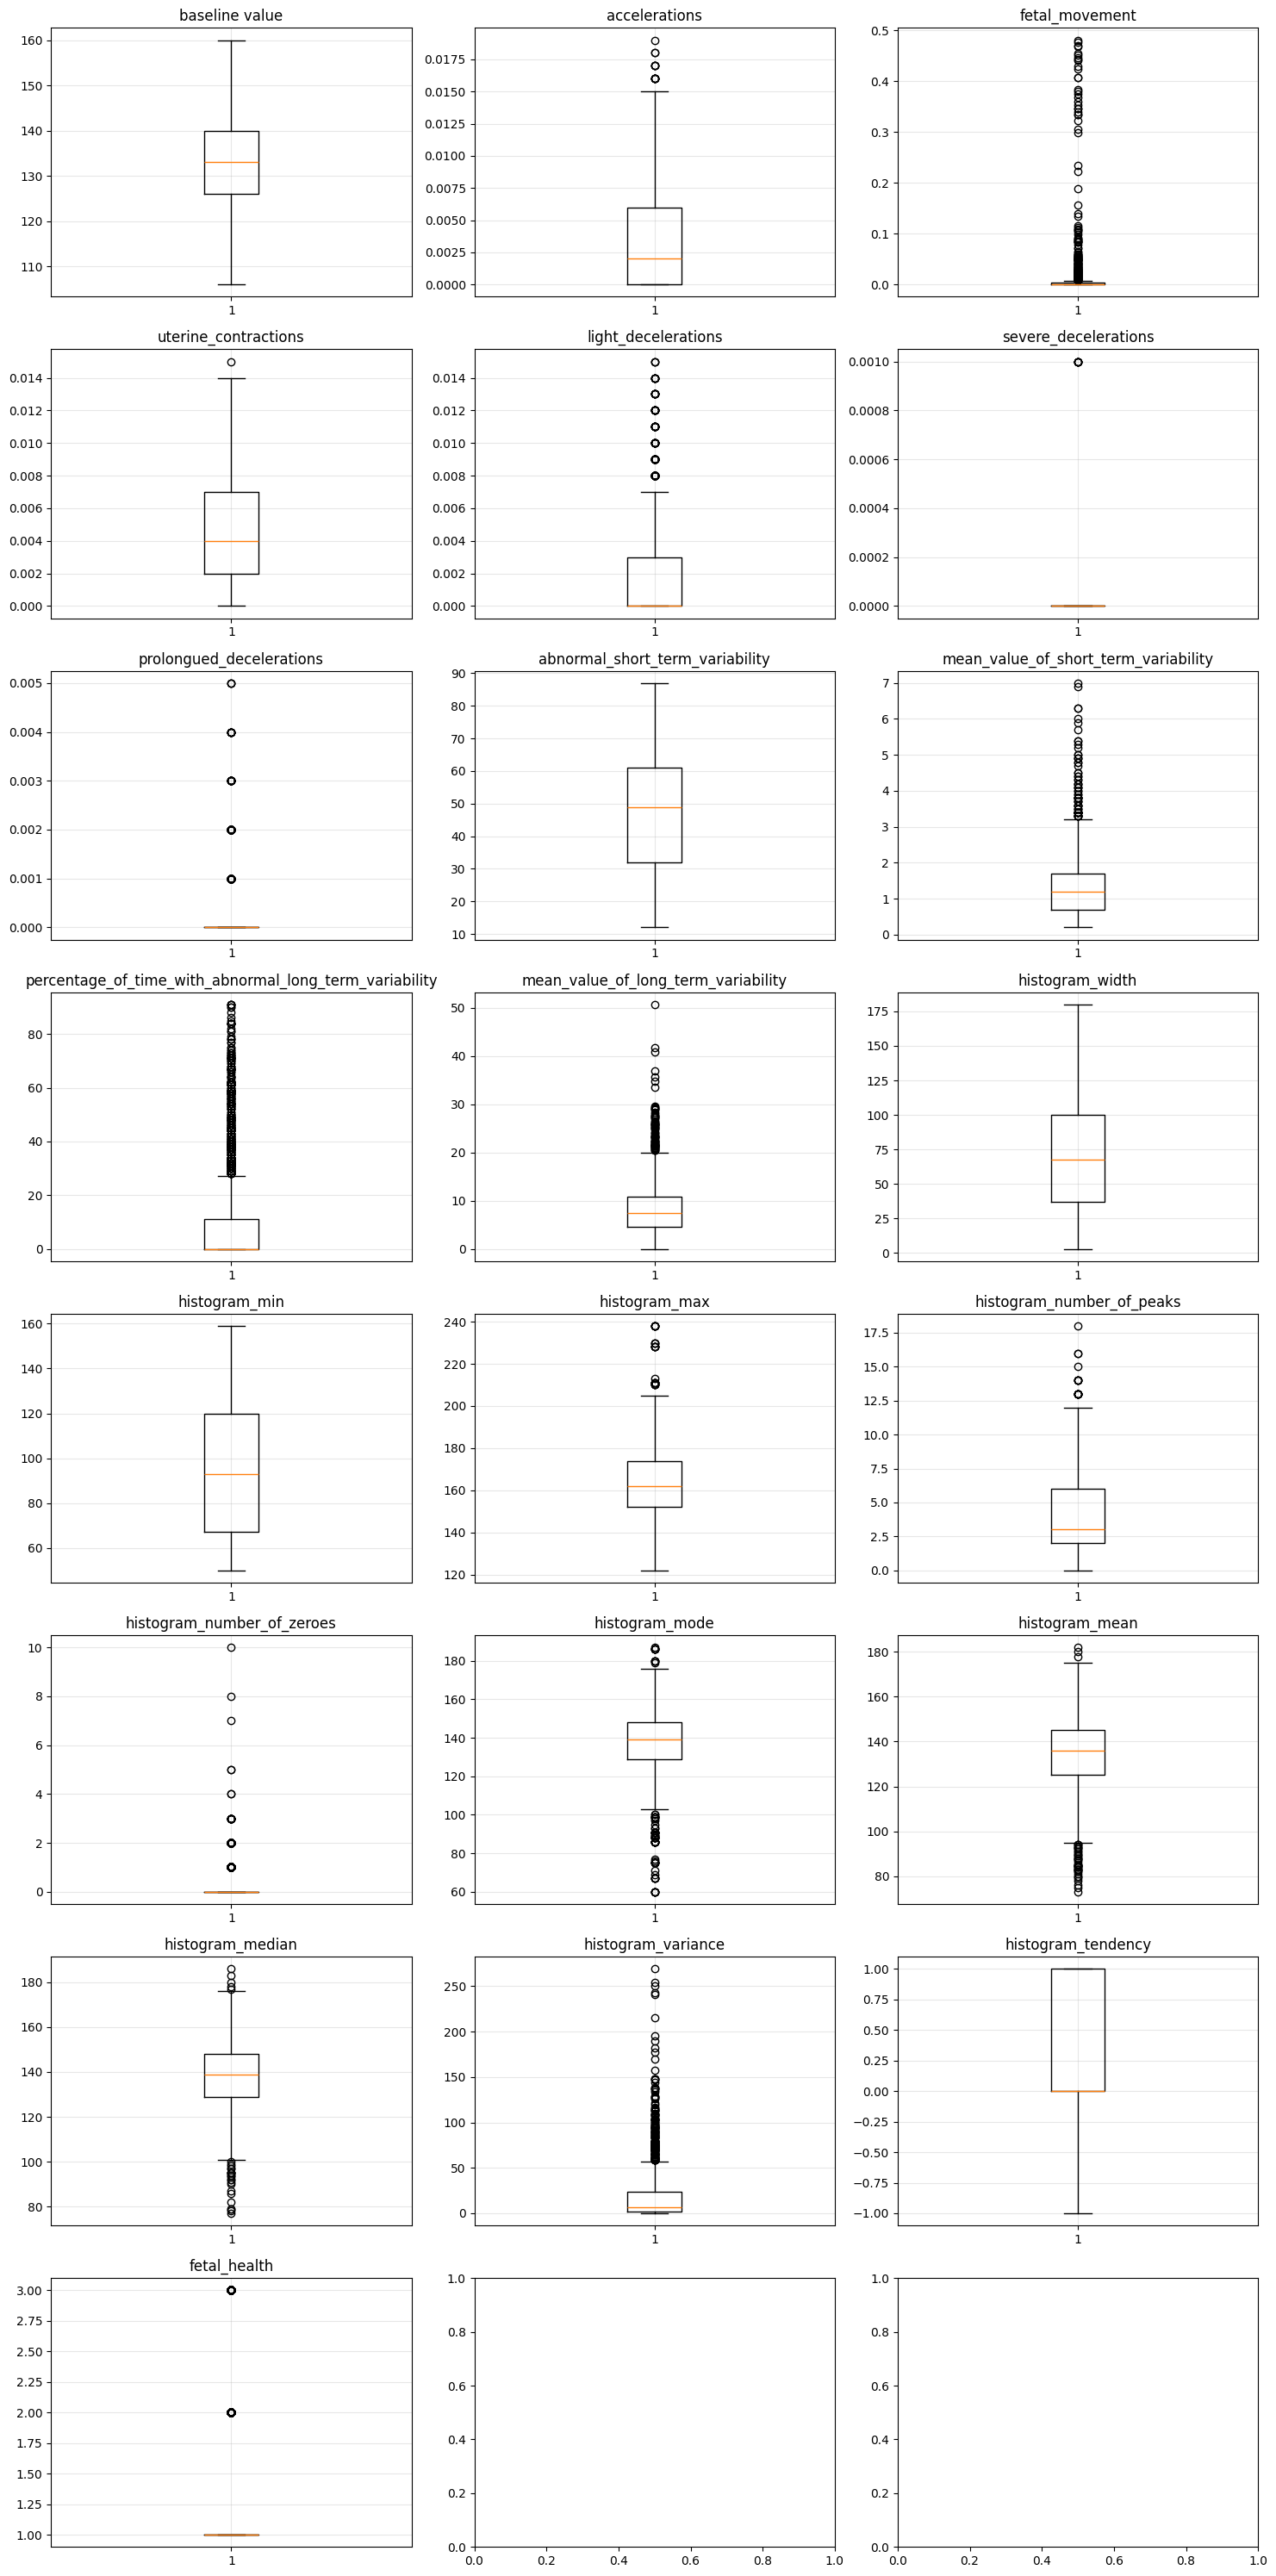

In [9]:
#boxplot для каждого параметра
fig, axes = plt.subplots(8, 3, figsize=(15, 30))

for ax, df in zip(axes.flat, data):
    ax.boxplot(x = data[df])
    ax.set_title(df)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

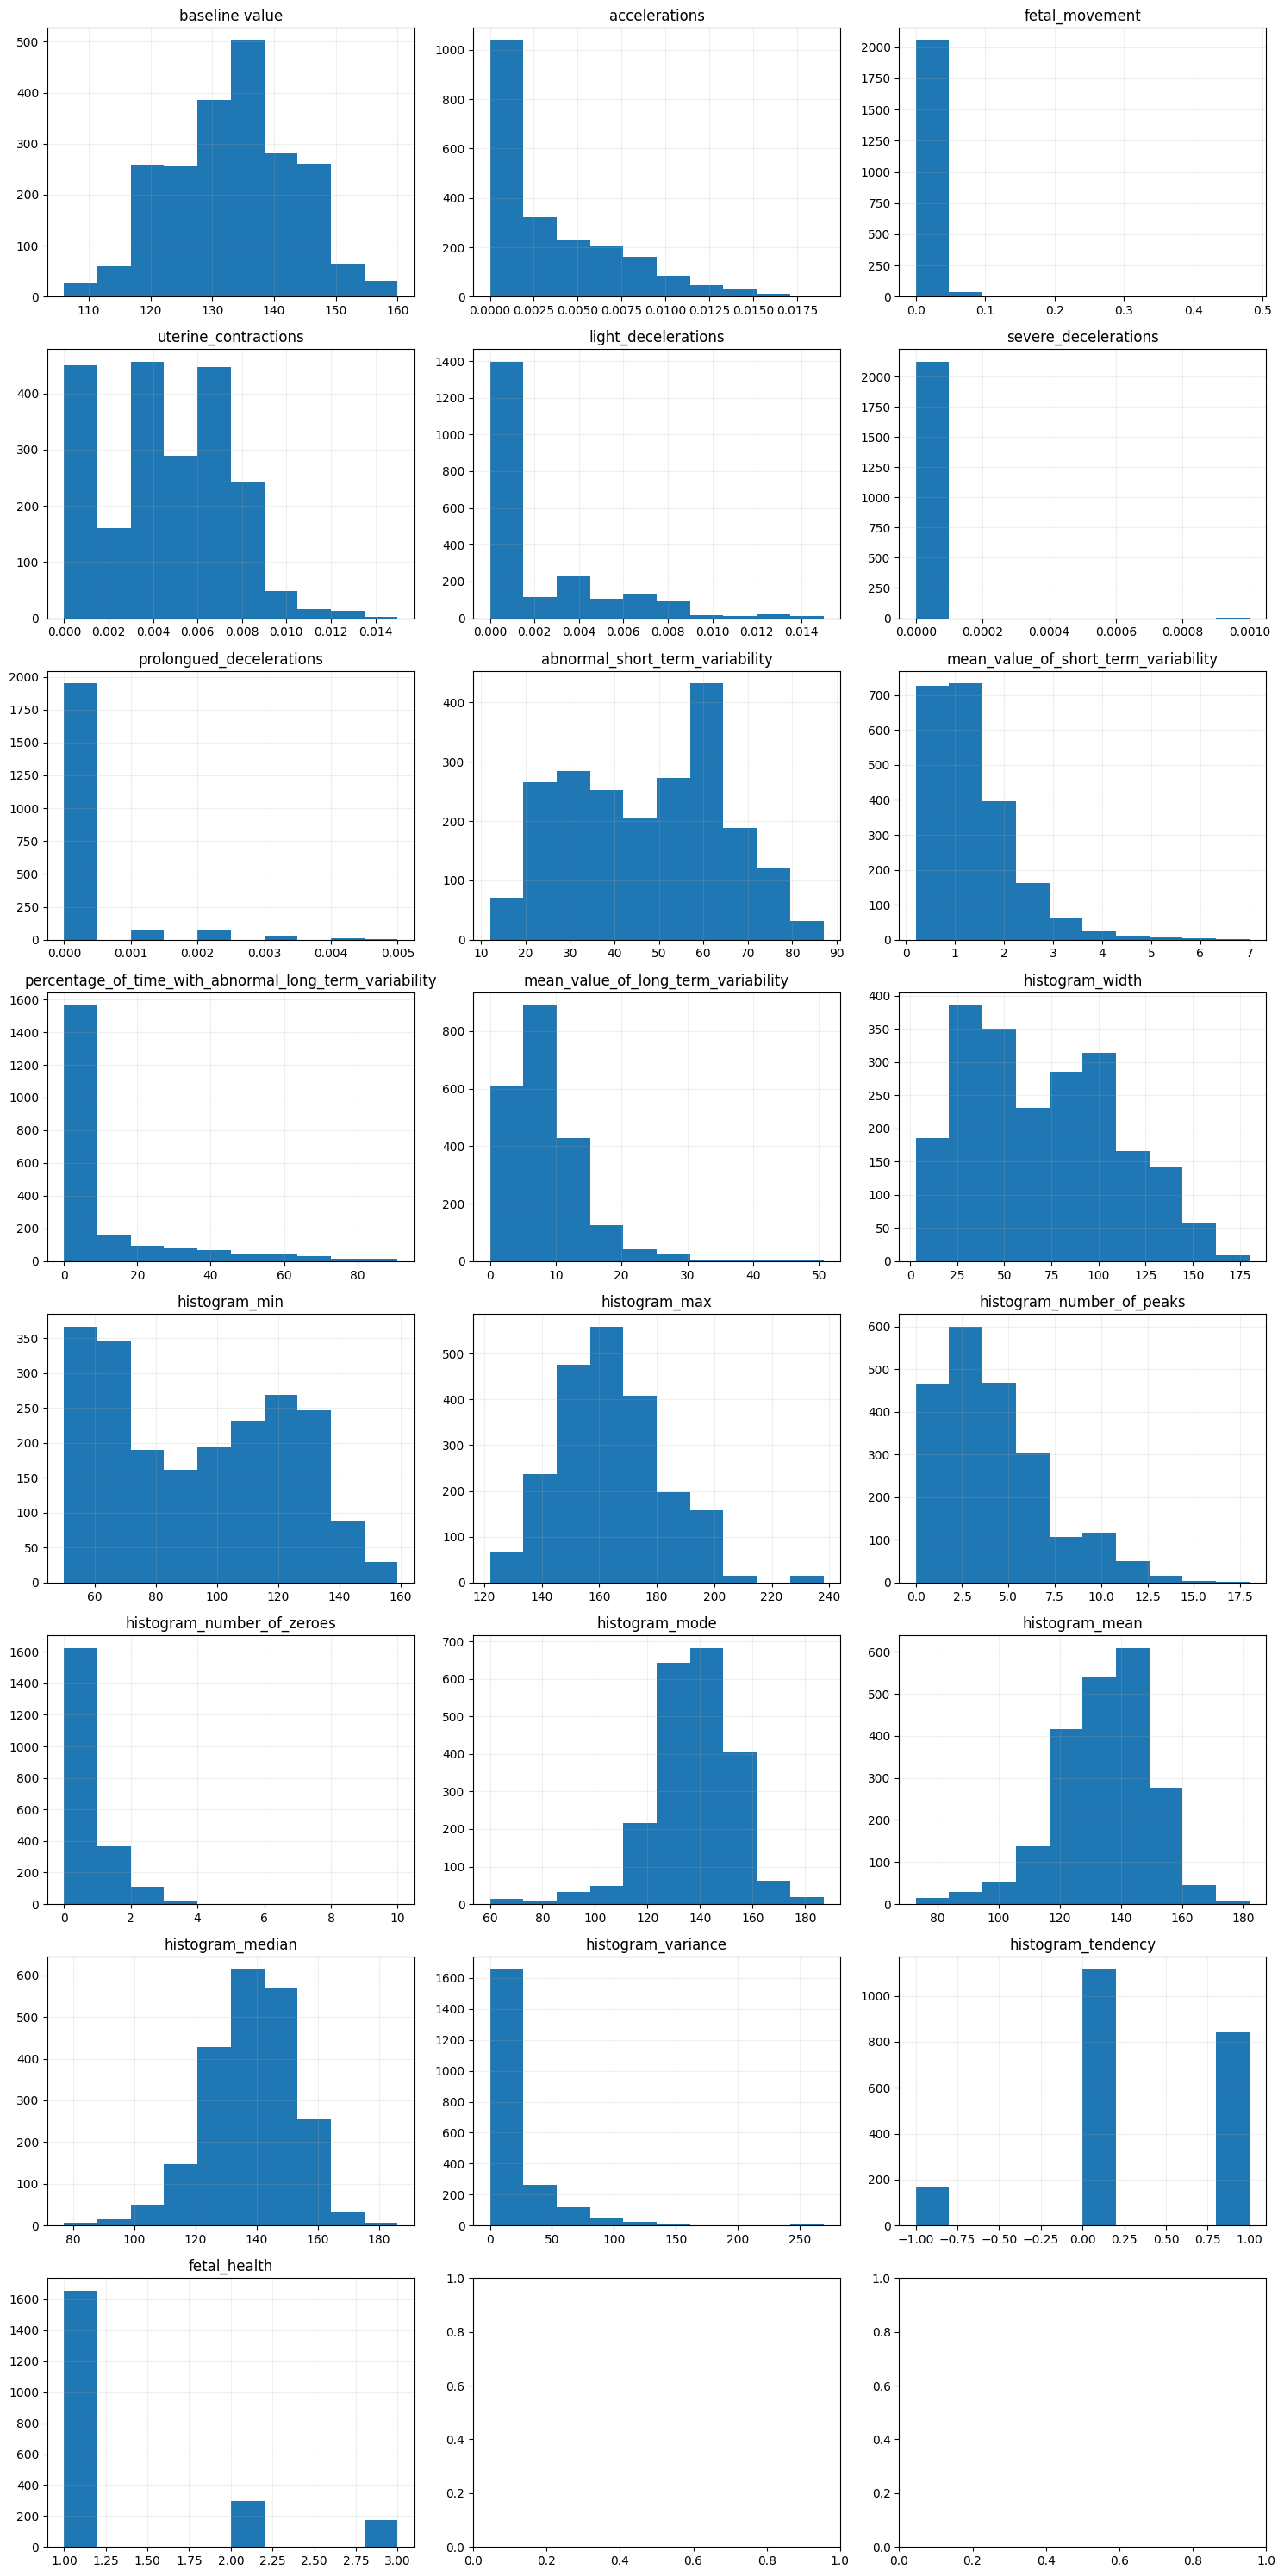

In [10]:
#Также можно посмотреть распределение признаков на гистограмме
fig, axes = plt.subplots(8, 3, figsize=(15, 30))

for ax, df in zip(axes.flat, data):
    ax.hist(data[df])
    ax.set_title(df)
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

Наиболее интересным для нас признаком является fetal_health, который показывает состояние плода, которое определялось опытными акушерами: 1 - нормальное, 2 - сомнительное, 3 - патологическое. Давайте коротко посмотрим распределение всех признаков сгруппированных по признаку fetal_health

In [11]:
y = data['fetal_health'] #целевой признак
x = data.drop('fetal_health', axis = 1) #датасет без целевого признака

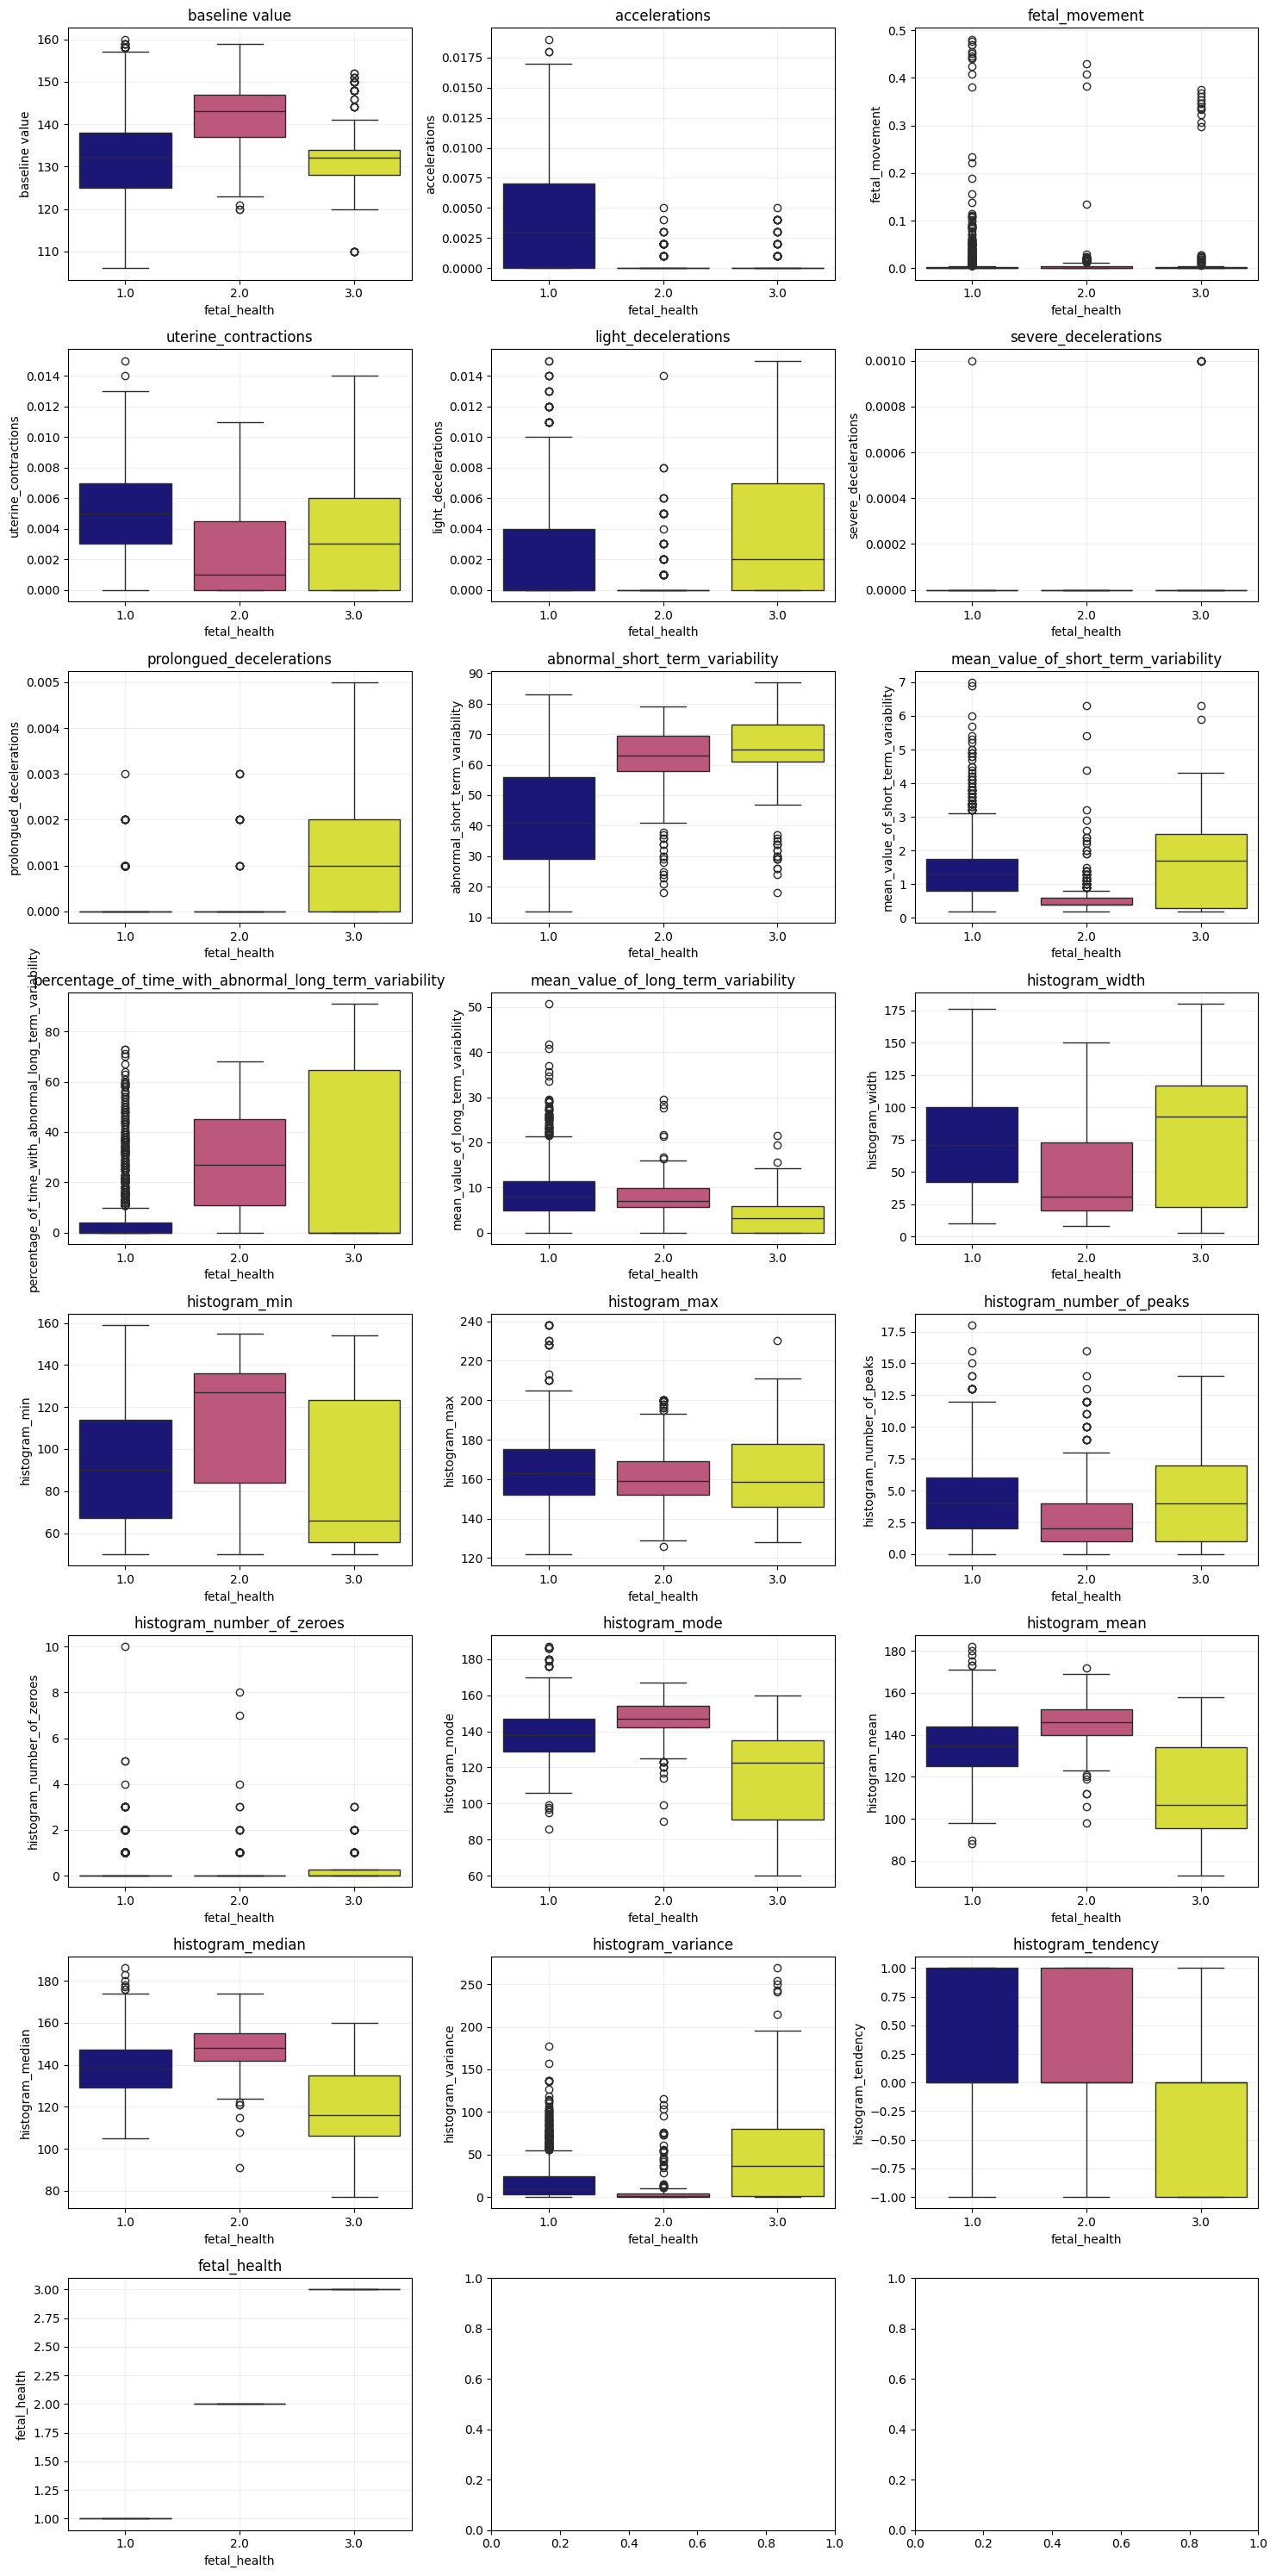

In [12]:
fig, axes = plt.subplots(8, 3, figsize=(15, 30))

for ax, df in zip(axes.flat, data):
    sns.boxplot(x = y, y = data[df], ax = ax, hue = y, legend = False, palette = 'plasma') #по оси x - номер группы
    ax.set_title(df)
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

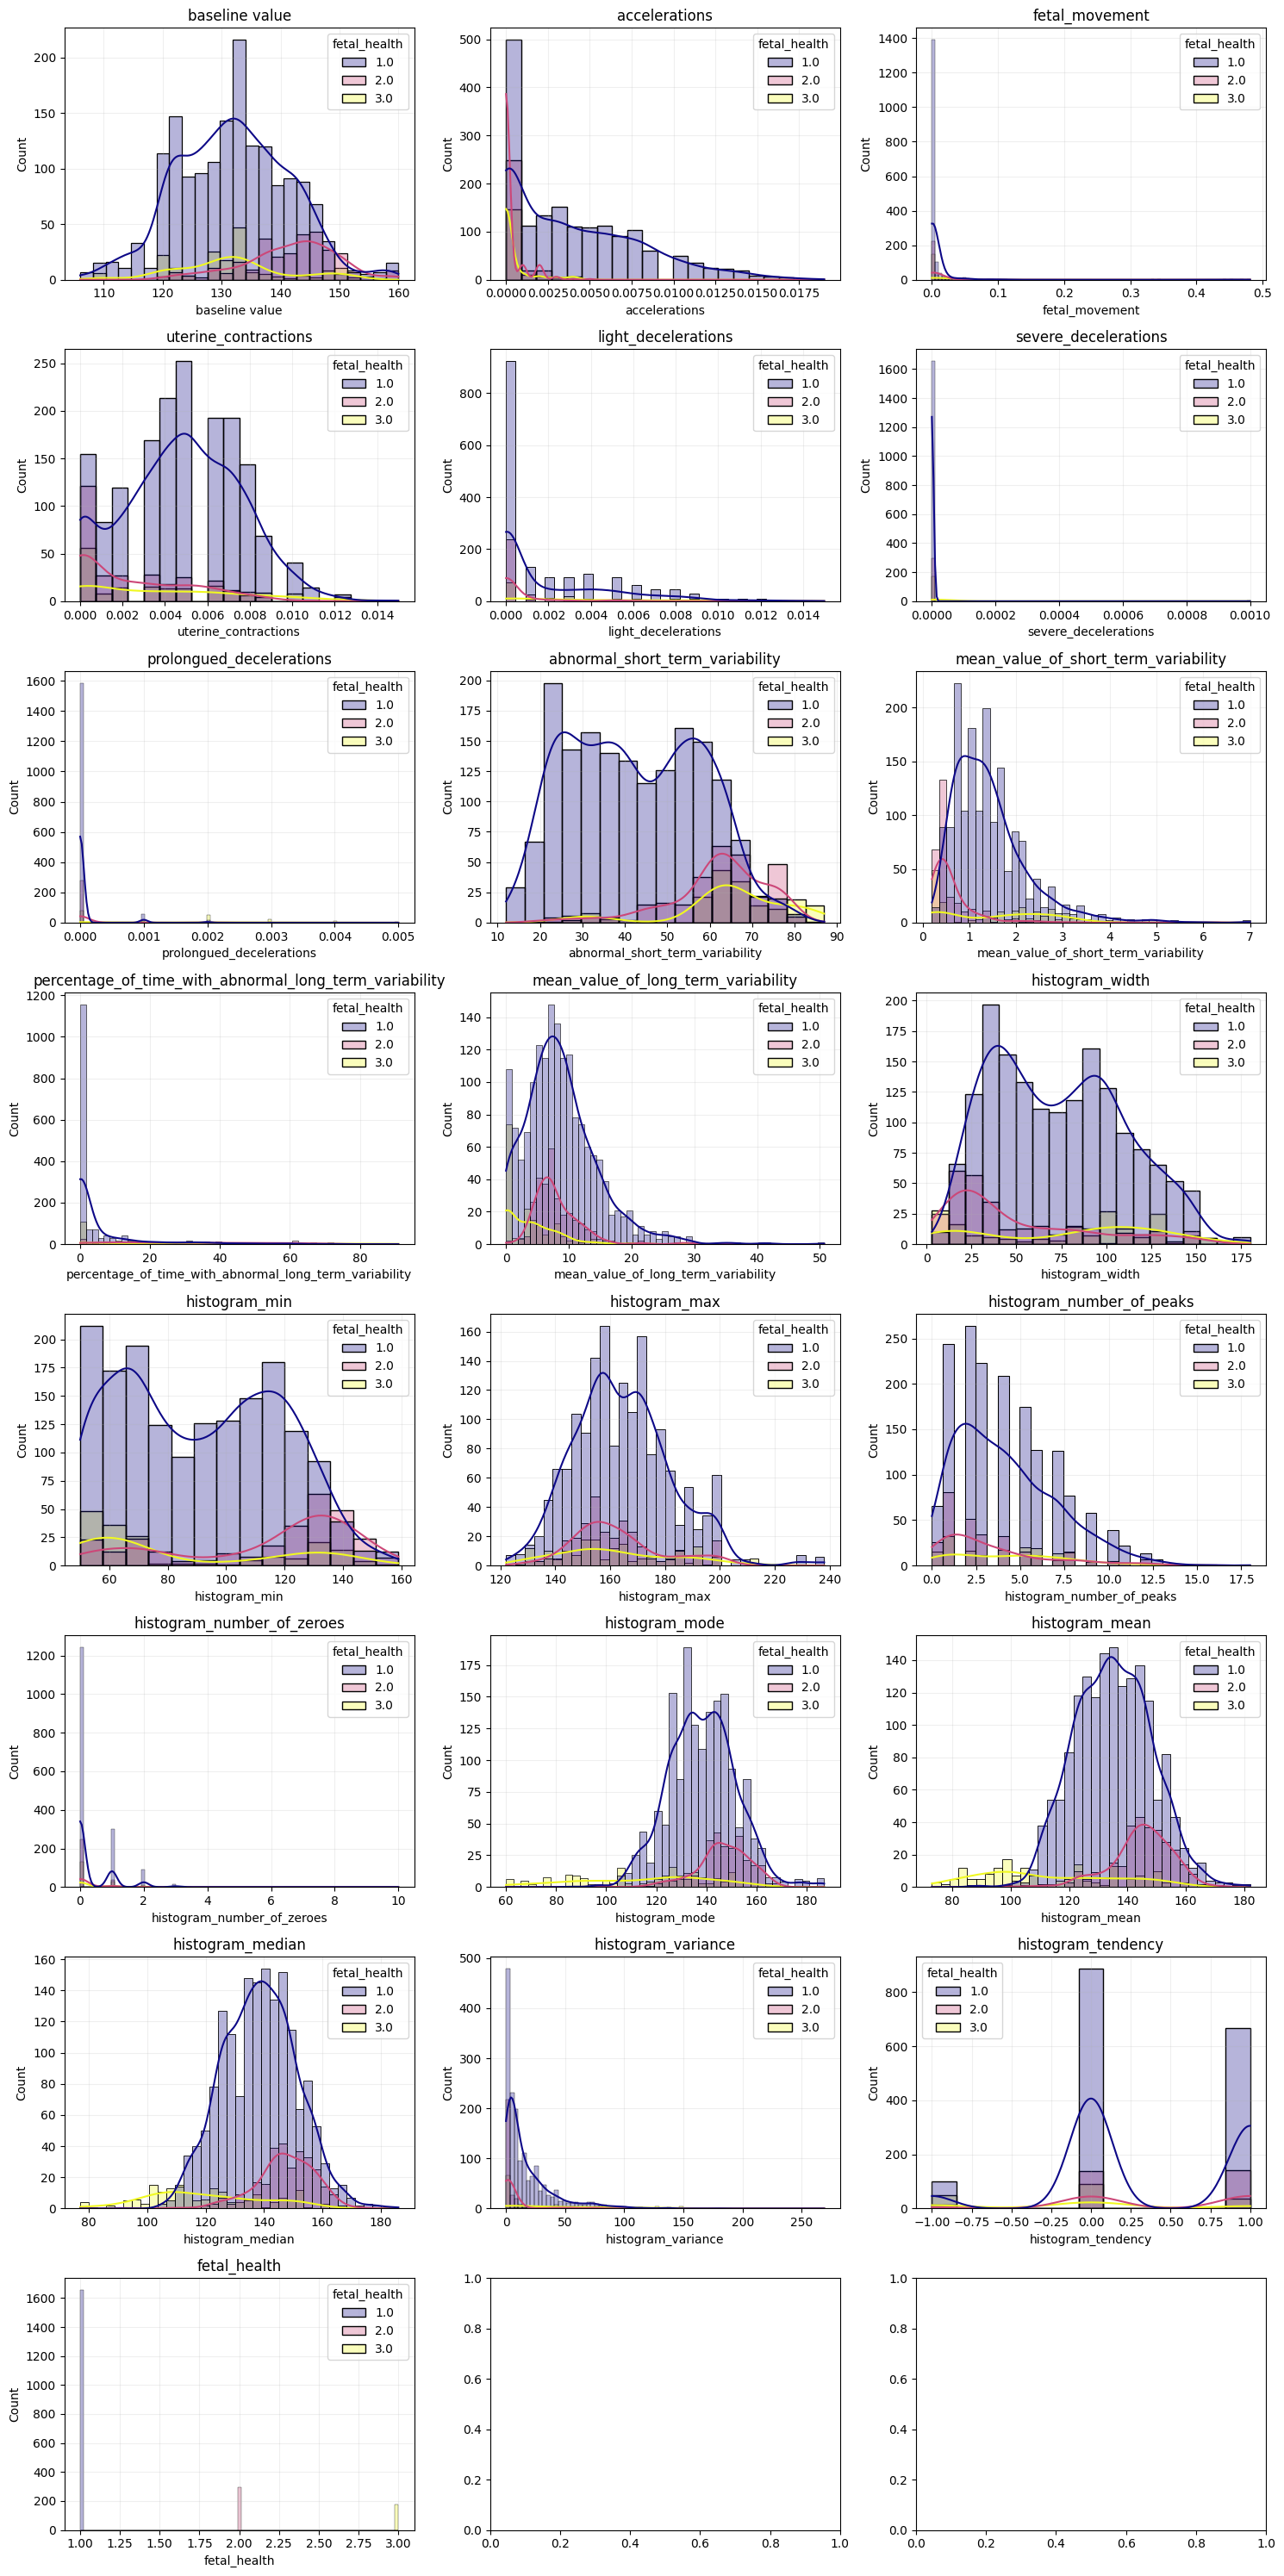

In [13]:
#и то же самое с гистограмами 
fig, axes = plt.subplots(8, 3, figsize=(15, 30))

for ax, df in zip(axes.flat, data):
    sns.histplot(x = df, data = data, ax = ax, hue = 'fetal_health',
                alpha = 0.3, kde = True, palette = 'plasma')
    ax.set_title(df)
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

Можно заметить что некоторые данные распределены ненормально(например histogram_width), и, возможно, для них потребуется отдельный подход.

Достаточно спорным является вопрос о нахождении выбросов в этих данных. Как мы видим из графиков(тех что имеют непрерывистые параметры), значения могут сильно варьироваться, особенно у не здоровых - это вполне может нормальным явлением для медицинских данных. Также стоит заметить что самих данных о не здоровых достаточно немного, и их потеря может оказаться критической.

In [14]:
print('Сомнительные:',len(data[data['fetal_health'] == 2]))
print('Патология:',len(data[data['fetal_health'] == 3]))

Сомнительные: 295
Патология: 176


Более менее приемлемым решением может являться удаление выбросов в здоровой группе, но из за многомерности данных это может стать проблематичным: неясно по какому параметру удалять выбросы. Можно сделать деление по 1.5Qint размаху сразу по всем параметрам:

In [15]:
print('Здоровые до отчистки:',len(data[data['fetal_health'] == 1]))
filtred_data = data.copy()[data['fetal_health'] == 1]
for par in filtred_data.drop('fetal_health', axis = 1).columns:
    Q1 = filtred_data[par].quantile(0.25)
    Q3 = filtred_data[par].quantile(0.75)
    Qinter = (Q3 - Q1)*1.5
    filtred_data = filtred_data[((Q1 - Qinter) <= filtred_data[par]) & (filtred_data[par] <= (Q3 + Qinter))]
filtred_data = pd.concat([data[~(data['fetal_health'] == 1)], filtred_data], axis = 0)
print('Здоровые после отчистки:',len(filtred_data[filtred_data['fetal_health'] == 1]))

Здоровые до отчистки: 1655
Здоровые после отчистки: 729


Удалилось более половины значений, это явно не нормальный результат. Такое может объясняться естественной ассиметрии данных или их не унимодальному распределению(что видно на графиках выше). Так что кажуещееся верное решение это отсеить данные только по нормальным признакам. Можем воспользоватся тестом Шапиро-Уилка для определения нормальности данных:

In [16]:
import scipy
def isNorm(par, a = 0.05):
    stat, p_value = scipy.stats.shapiro(par) #если вернет 0.05 или выше - распределение нормальное
    return (p_value > a)

Важно сказать что мы будем брать небольшое количество случайных значений для каждого признака, из за того что тест Шапиро-Уилко становится гиперчувствительным при больших выборках, и скажет что никакое из распределений не нормальное(проверено):

In [83]:
for col in x.columns:
    df = data[data['fetal_health'] == 1].sample(50) #используем только на здоровых и берем по 50 экземпляров
    print(f'{col} нормальное? - {isNorm(df[col])}') 

baseline value нормальное? - True
accelerations нормальное? - False
fetal_movement нормальное? - False
uterine_contractions нормальное? - True
light_decelerations нормальное? - False
severe_decelerations нормальное? - True
prolongued_decelerations нормальное? - False
abnormal_short_term_variability нормальное? - False
mean_value_of_short_term_variability нормальное? - False
percentage_of_time_with_abnormal_long_term_variability нормальное? - False
mean_value_of_long_term_variability нормальное? - True
histogram_width нормальное? - True
histogram_min нормальное? - False
histogram_max нормальное? - True
histogram_number_of_peaks нормальное? - False
histogram_number_of_zeroes нормальное? - False
histogram_mode нормальное? - True
histogram_mean нормальное? - True
histogram_median нормальное? - True
histogram_variance нормальное? - False
histogram_tendency нормальное? - False


Тест выявил возможные нормальные распределения, посмотрим на все распределения через Q-Q plot что бы удостовериться:

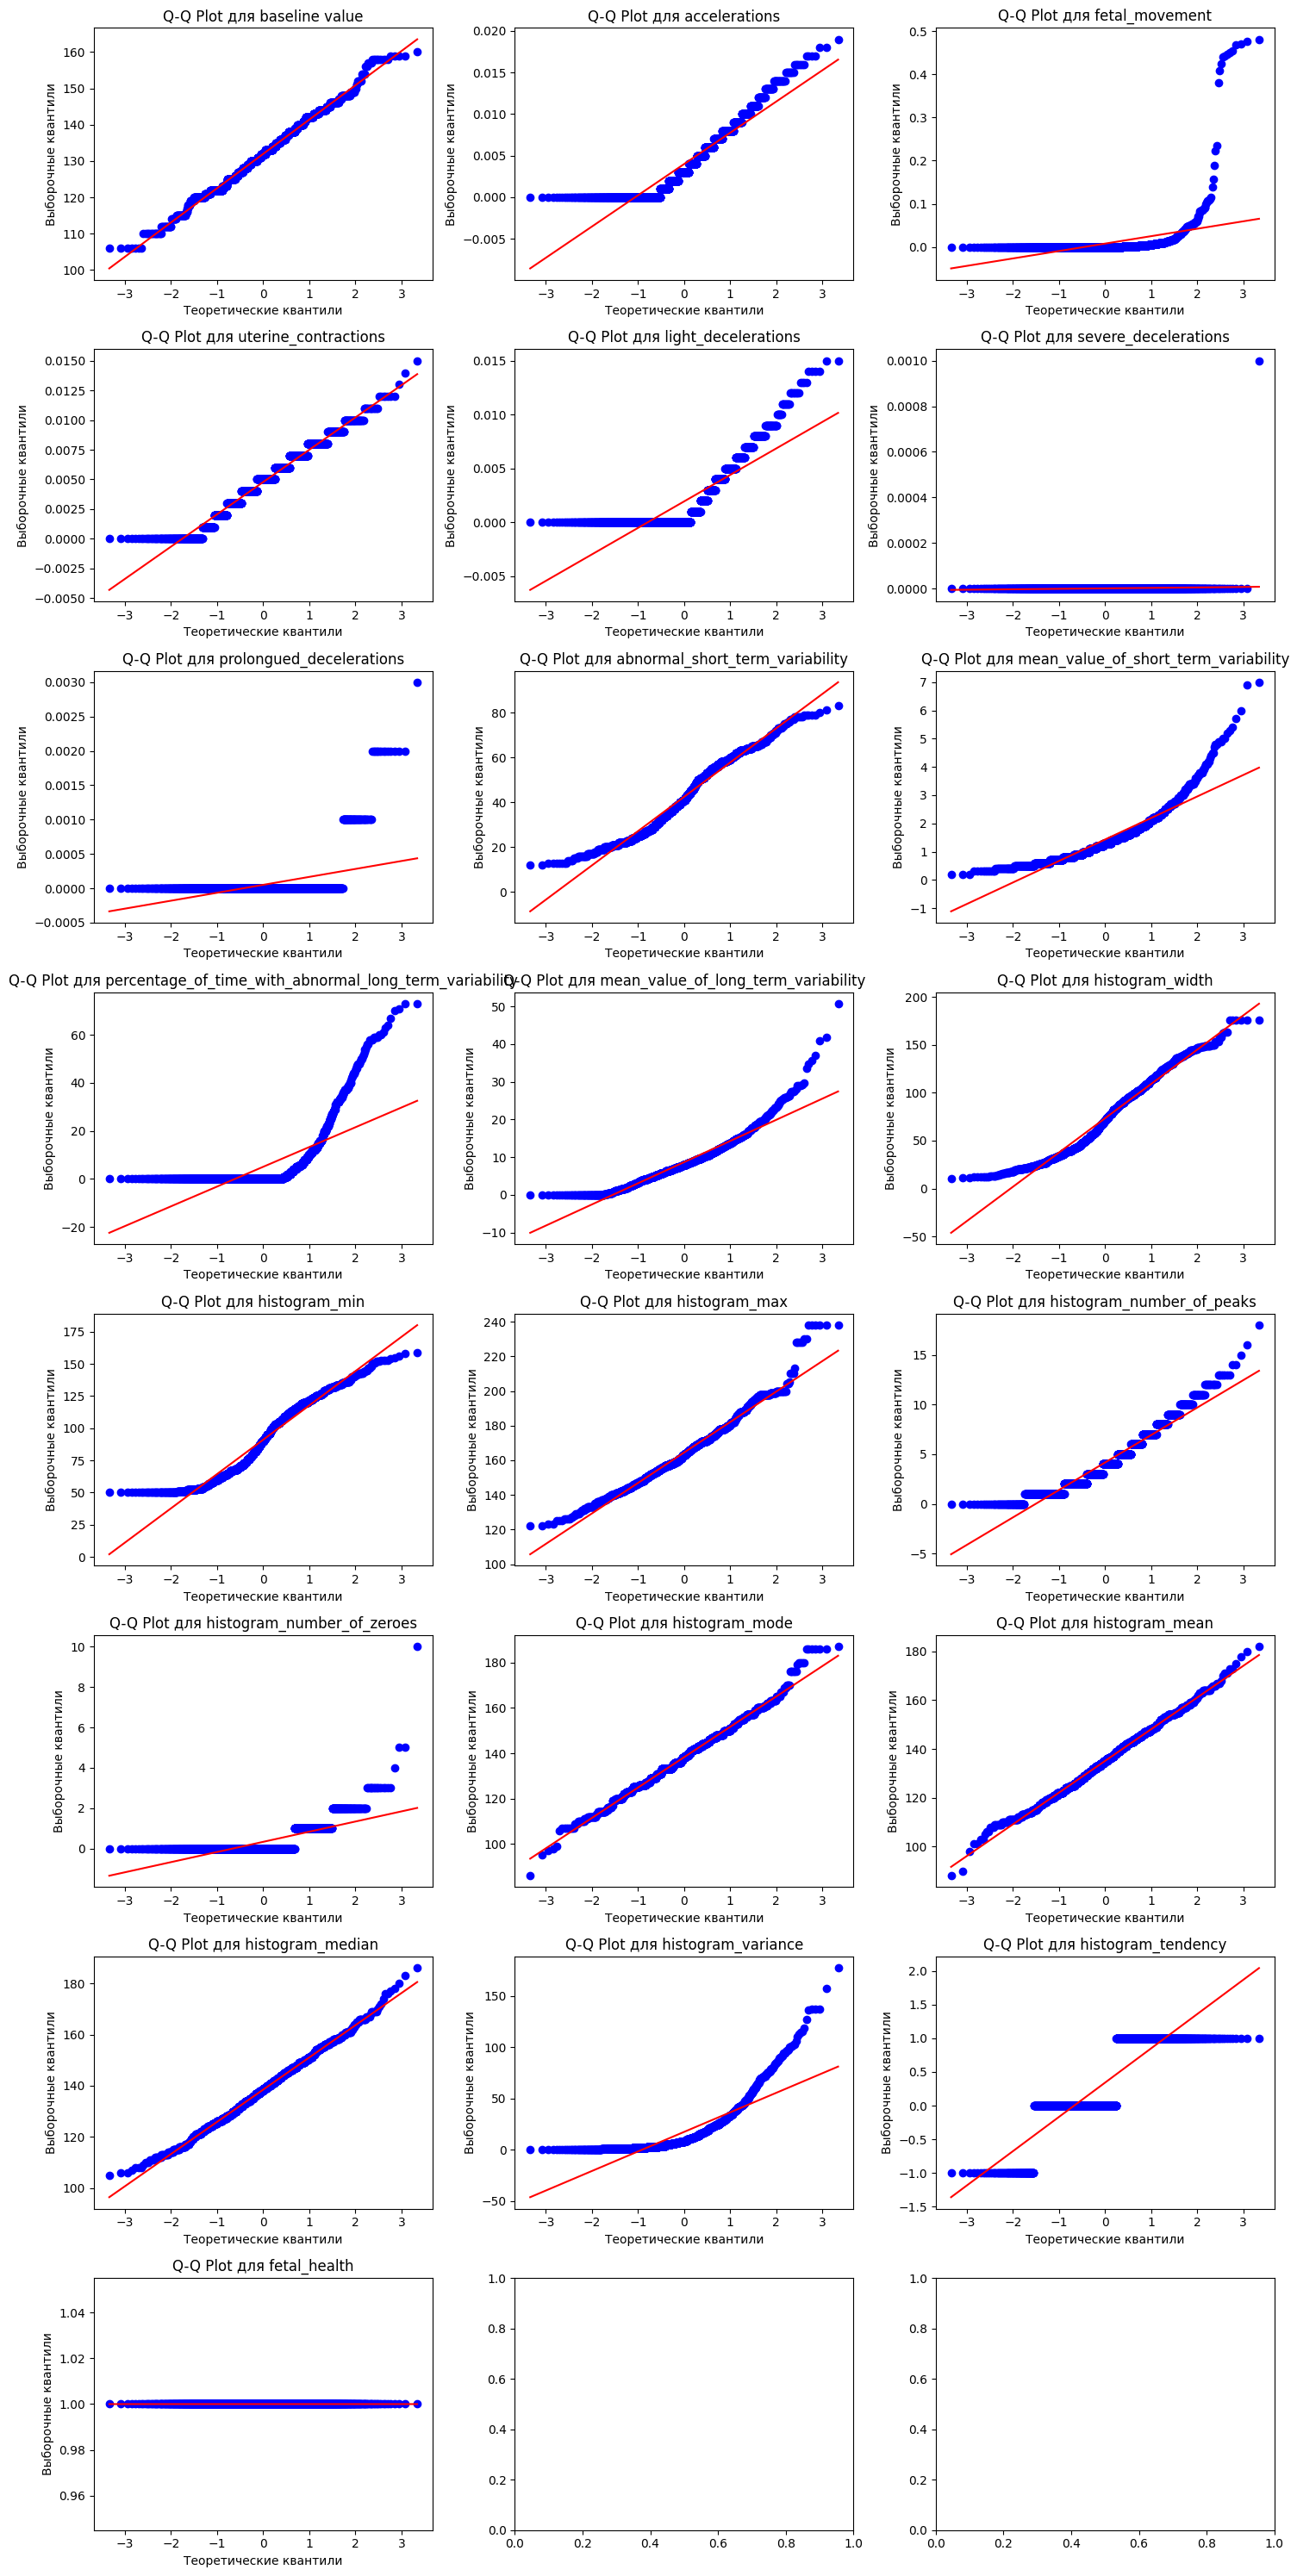

In [18]:
fig, axes = plt.subplots(8, 3, figsize=(15, 30))
axes_flat = axes.flatten()

for i, column in enumerate(data.columns):
    scipy.stats.probplot(data[column][data['fetal_health'] == 1], dist="norm", plot=axes_flat[i]) #берем здоровых
    axes_flat[i].set_title(f'Q-Q Plot для {column}')
    axes_flat[i].set_xlabel('Теоретические квантили')
    axes_flat[i].set_ylabel('Выборочные квантили')
plt.tight_layout()
plt.show()

Здесь уже видны графики с более или менее нормальным распределением(точки лежат на прямой), это могут быть например baseline_value, abnormal_short_term_variability, histogram_mode, histogram_mean, histogram_median, fetal_health не берем, и достаточно важно: тест Шапиро-Уилка пометил признак severe_decelerations как нормальный(не отверг нулевую гипотезу), НО на qq-plot мы видими пусть и совпадающую с точками, но почти полностью горизонтальную прямую(чуть смещена из за какого то большого значения), этот признак для здоровых имеет значение константу(вырожденное распределение) и не является нормальным. Давайте выберем в роли "отсеивающих" относительно нормальные данные. Но сначала посмотрим отдельно на то большое значение из severe_decelerations(оно равно 0.001) во всей выборке::

In [19]:
data[data['severe_decelerations'] == 0.001]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1488           132.0          0.002           0.000                 0.008   
1489           132.0          0.000           0.000                 0.006   
1791           121.0          0.000           0.001                 0.004   
1792           121.0          0.000           0.001                 0.003   
1793           121.0          0.000           0.001                 0.005   
1794           121.0          0.000           0.001                 0.003   
1795           121.0          0.000           0.000                 0.004   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1488                0.000                 0.001                     0.001   
1489                0.000                 0.001                     0.001   
1791                0.010                 0.001                     0.000   
1792                0.011                 0.001                     0.000   
1793                0.012                 0.001                     0.000   
1794                0.010                 0.001                     0.000   
1795                0.009                 0.001                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1488                             31.0                                   1.4   
1489                             32.0                                   1.3   
1791                             66.0                                   2.1   
1792                             67.0                                   2.1   
1793                             66.0                                   2.1   
1794                             68.0                                   2.1   
1795                             70.0                                   1.9   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1488                                                0.0       ...   
1489                                                0.0       ...   
1791                                                0.0       ...   
1792                                                0.0       ...   
1793                                                0.0       ...   
1794                                                0.0       ...   
1795                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1488           61.0          163.0                        5.0   
1489           60.0          151.0                        1.0   
1791           55.0          160.0                        7.0   
1792           55.0          157.0                        4.0   
1793           55.0          157.0                        5.0   
1794           55.0          157.0                        3.0   
1795           55.0          157.0                        6.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1488                         0.0            99.0           121.0   
1489                         1.0            99.0           116.0   
1791                         0.0            67.0            85.0   
1792                         1.0            67.0            81.0   
1793                         1.0            67.0            83.0   
1794                         1.0            67.0            79.0   
1795                         2.0            67.0            76.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
1488             129.0                94.0                 1.0           1.0  
1489             125.0                72.0                 1.0           3.0  
1791              92.0               109.0                -1.0           3.0  
1792              87.0                89.0                -1.0           3.0  
1793              90.0                98.0                -1.0           3.0  
1794              82.0                83.0    

Значение 0.001 у этого признака есть только у одного здорового(в остальных случаях оно встречается только у больных) и вряд ли имеет статистический вес. Можно удалить эту запись у здоровых:

In [20]:
filtred_data = data.copy()[data['fetal_health'] == 1] #скопируем исходный датасет со здоровыми
print("Длина была", len(filtred_data))
filtred_data = filtred_data.drop(filtred_data.query("fetal_health == 1 and severe_decelerations == 0.001").index, axis = 0)
print("Длина стала", len(filtred_data))

Длина была 1655
Длина стала 1654


Убедились что удалили 1 значение, теперь отфильтруем выбросы:

In [21]:
print('Здоровые до отчистки:', len(filtred_data))
for par in ['baseline value', 'abnormal_short_term_variability', 'histogram_median', 'histogram_mean', 'histogram_max', 'histogram_mode']: #кандидаты на "нормальность"
    Q1 = filtred_data[par].quantile(0.25)
    Q3 = filtred_data[par].quantile(0.75)
    Qinter = (Q3 - Q1)*1.5
    filtred_data = filtred_data[((Q1 - Qinter) <= filtred_data[par]) & (filtred_data[par] <= (Q3 + Qinter))]
filtred_data = pd.concat([data[~(data['fetal_health'] == 1)], filtred_data], axis = 0) #получили filtred_data - очищенный от выбросов датасет
print('Здоровые после отчистки:',len(filtred_data[filtred_data['fetal_health'] == 1]))

Здоровые до отчистки: 1654
Здоровые после отчистки: 1606


Немного значений ушло, можно продолжать сравнение. Вернемся у гистограмам для каждой группы. Из графиков можно уловить некоторые различия в группах здоровья(например более высокое значение abnormal_short_term_variability для не здоровых групп), однако давайте подтвердим это t-тестами. Стоит учесть, что будет проведено 3(пар групп)*21(колво признаков без учета целевого) = 63 т-тестов, что явно вызовет проблему множественного сравнения и ошибку первого рода, так что применим поправки для множественных сравнений.

Для демонстрации используем три поправки(Бенферонни, метод Холма, и FDR метод), однако валидным будем считать FDR,
из за его большей предпочтительности для исследовательских целей. Но сначала сделаем т-тестирование без поправок:

In [22]:
from scipy.stats import ttest_ind

In [23]:
def make_t_data(data, group_name):
    '''Принимает на вход DataFrame и название колонки,
    по которой будет происходить группировка в t_data формат(вложенный словарь): Верхний уровень - группировка по признаку,
    второй уровень - по группам.
    '''
    t_data = {}
    groups = data[group_name].unique()
    for par in data.drop(group_name, axis = 1):
        grouped_par = {}
        for ind in groups:            
            grouped_par[ind] = data[data[group_name] == ind][par]
        t_data[par] = grouped_par
    return t_data

In [46]:
t_data = make_t_data(filtred_data, 'fetal_health') #Сделаем t данные

In [47]:
def pair_t_test(t_data, n_epo):
    res = {}
    for par in t_data.keys():
        groups = list(t_data[par].keys())
        leng = len(groups)
        for group_ind1 in range(leng-1):
            for group_ind2 in range(group_ind1+1, leng):
                data1 = t_data[par][groups[group_ind1]]
                data2 = t_data[par][groups[group_ind2]]
                len1 = len(data1)
                len2 = len(data2)
                if len1 == len2:
                    tres = ttest_ind(data1, data2, equal_var = False)
                    res.setdefault(par, {})[(groups[group_ind1], groups[group_ind2])] = {'pvalue':tres.pvalue,'statistic': tres.statistic}
                else:
                    statlist = []
                    for _ in range(n_epo):
                        if len1 > len2:
                            data1s = data1.sample(len2)
                            data2s = data2
                        else:
                            data1s = data1
                            data2s = data2.sample(len1)

                        tres = ttest_ind(data1s, data2s, equal_var = False)
                        statlist.append(tres.statistic)
                    df = 2 * min(len1,len2) - 2
                    pvalue = 2.0 * (1.0 - scipy.stats.t.cdf(abs(np.median(statlist)), df))
                    res.setdefault(par, {})[(groups[group_ind1], groups[group_ind2])] = {'pvalue':pvalue,
                                                                                                      'statistic':np.median(statlist)}

    return res      
            

In [61]:
results = pair_t_test(t_data, 20)

In [77]:
def pretty_t(results, a = 0.05, pval = 'pvalue'):
    phist = []
    for par in results.keys():
        print(f'{par}:')
        for group in results[par]:
            p = results[par][group][pval]
            phist.append(p)
            print(f'{int(group[0])} и {int(group[1])} - {pval}: {p:.5f}, отвергается ли нулевая гипотеза: {'Да' if p < a else 'Нет'}')
        print('-'*50)
    sns.histplot([0 if p > a else 1 for p in phist])

baseline value:
2 и 3 - pvalue: 0.00000, отвергается ли нулевая гипотеза: Да
2 и 1 - pvalue: 0.00000, отвергается ли нулевая гипотеза: Да
3 и 1 - pvalue: 0.96201, отвергается ли нулевая гипотеза: Нет
--------------------------------------------------
accelerations:
2 и 3 - pvalue: 0.27736, отвергается ли нулевая гипотеза: Нет
2 и 1 - pvalue: 0.00000, отвергается ли нулевая гипотеза: Да
3 и 1 - pvalue: 0.00000, отвергается ли нулевая гипотеза: Да
--------------------------------------------------
fetal_movement:
2 и 3 - pvalue: 0.01566, отвергается ли нулевая гипотеза: Да
2 и 1 - pvalue: 0.80961, отвергается ли нулевая гипотеза: Нет
3 и 1 - pvalue: 0.01185, отвергается ли нулевая гипотеза: Да
--------------------------------------------------
uterine_contractions:
2 и 3 - pvalue: 0.00004, отвергается ли нулевая гипотеза: Да
2 и 1 - pvalue: 0.00000, отвергается ли нулевая гипотеза: Да
3 и 1 - pvalue: 0.00398, отвергается ли нулевая гипотеза: Да
-------------------------------------------

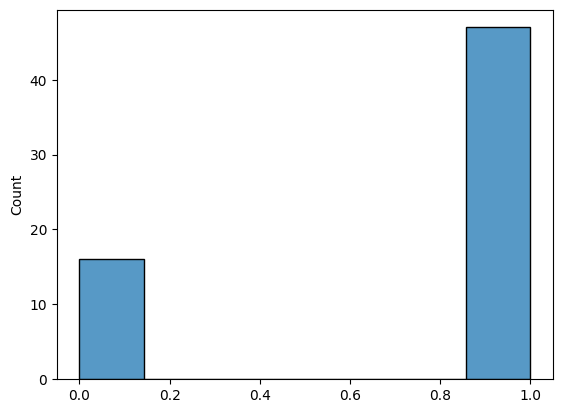

In [78]:
pretty_t(results)

Теперь, имея p-values от т-тестирования без поправкок, мы можем легко их применить на получившиеся p-values. Используем функцию multipletests для этого, при этом записывая результат в t_data формат, что бы легко вывести результаты потом. Также заметим что один из результатов сравнения есть nan(не число), вероятнее всего это просто очень маленькое значение, просто заменим nan на очень маленькое вещественное число:

In [64]:
results['severe_decelerations'][(2,1)]['pvalue'] = 1e-30

In [65]:
from statsmodels.stats.multitest import multipletests

def correct_p(t_data):
    corr_method = ['bonferroni', 'holm', 'fdr_bh']
    p_values = []
    ident = []
    for par in t_data:
        for group in t_data[par]:
            p_values.append(t_data[par][group]['pvalue'])
            ident.append((par, group))
    
    corr = {method: multipletests(p_values, method=method)[1] for method in corr_method}
    for i, (par, group) in enumerate(ident):
        for method in corr: 
            t_data[par][group][method] = corr[method][i]
    return t_data

In [66]:
results = correct_p(results)

<Axes: xlabel='values', ylabel='count'>

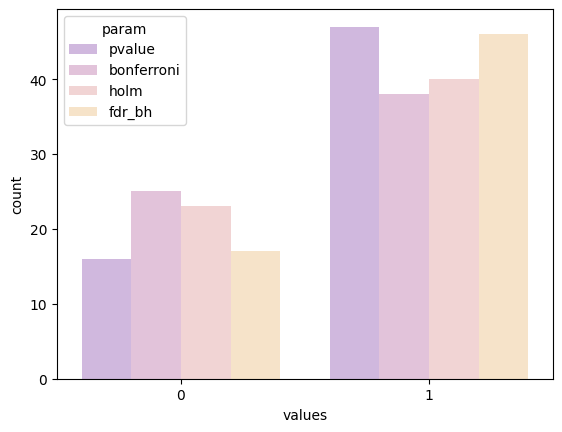

In [67]:
par_data = [[],[]]
for col in results:
    for group in results[col].values():
        for p in group:
            if p == 'statistic':
                continue
            par_data[0].append(int(group[p] < 0.05))
            par_data[1].append(p)
par_data = pd.DataFrame({'values': par_data[0], 'param': par_data[1]})
sns.countplot(x = 'values', data = par_data, hue = 'param',
                alpha = 0.3, palette = 'plasma')

In [76]:
print(np.shape(par_data[(par_data['param'] == 'holm') & (par_data['values'] == 1)])[0],
      np.shape(par_data[(par_data['param'] == 'bonferroni') & (par_data['values'] == 1)])[0],
      np.shape(par_data[(par_data['param'] == 'fdr_bh') & (par_data['values'] == 1)])[0],
      np.shape(par_data[(par_data['param'] == 'pvalue') & (par_data['values'] == 1)])[0])

40 38 46 47


Как мы видим разные поправки изменили результат некоторых пар сравнения. Теперь посмотрим на итоговые значения и попробуем сделать примерные выводы насчет влияния наших параметров(по отдельности) на общее состояния плода, отберем те параметры, у которых есть различия как минимум между 1 и 3 группой(по fdr_bh значению):

In [70]:
diff_p = results.copy()
for par in results:
    if results[par][(3,1)]['fdr_bh'] >= 0.05:
        del diff_p[par]

accelerations:
2 и 3 - fdr_bh: 0.31203, отвергается ли нулевая гипотеза: Нет
2 и 1 - fdr_bh: 0.00000, отвергается ли нулевая гипотеза: Да
3 и 1 - fdr_bh: 0.00000, отвергается ли нулевая гипотеза: Да
--------------------------------------------------
fetal_movement:
2 и 3 - fdr_bh: 0.02192, отвергается ли нулевая гипотеза: Да
2 и 1 - fdr_bh: 0.83616, отвергается ли нулевая гипотеза: Нет
3 и 1 - fdr_bh: 0.01778, отвергается ли нулевая гипотеза: Да
--------------------------------------------------
uterine_contractions:
2 и 3 - fdr_bh: 0.00006, отвергается ли нулевая гипотеза: Да
2 и 1 - fdr_bh: 0.00000, отвергается ли нулевая гипотеза: Да
3 и 1 - fdr_bh: 0.00611, отвергается ли нулевая гипотеза: Да
--------------------------------------------------
light_decelerations:
2 и 3 - fdr_bh: 0.00000, отвергается ли нулевая гипотеза: Да
2 и 1 - fdr_bh: 0.00000, отвергается ли нулевая гипотеза: Да
3 и 1 - fdr_bh: 0.00000, отвергается ли нулевая гипотеза: Да
---------------------------------------

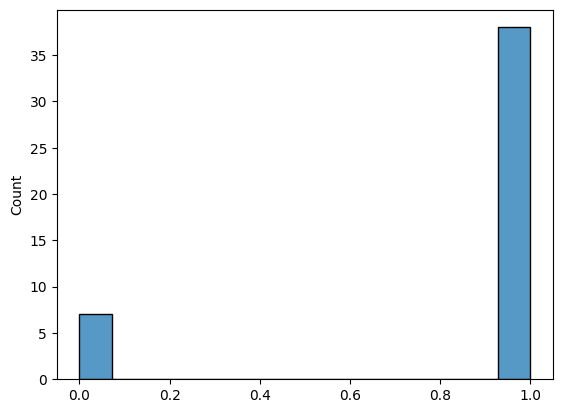

In [79]:
pretty_t(diff_p, pval = 'fdr_bh')